In [1]:
%matplotlib inline

import collections
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

def show_image(img):
    plt.figure(figsize=(8, 8))
    if not isinstance(img[0][0], collections.Iterable):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

In [2]:
# You can reload data here
olivetti = sklearn.datasets.fetch_olivetti_faces()
iris = sklearn.datasets.load_iris()
boston = sklearn.datasets.load_boston()
locals().update(np.load('data/toy_data.npz'))
starry_bw_lst = list(map(list, starry_bw))

### Refresher

#### 1. Add up elements of a list

In [3]:
def list_sum(lst):
    x = 0
    for i in lst:
        x += i
    return x

assert list_sum([]) == 0
assert list_sum([10, 11]) == 21
assert list_sum([1, 2, 3, 4]) == 10

#### 2. Square elements of a list

In [4]:
def list_square(lst):
    squared = []
    for x in lst:
        squared.append(x ** 2)
    return squared

assert list_square([]) == []
assert list_square([1]) == [1]
assert list_square([1, 2]) == [1, 4]
assert list_square([2, 11, 7]) == [4, 121, 49]

#### 3. Add two lists(elementwise)

In [5]:
def list_add(a, b):
    added = []
    for i in range(len(a)):
        added.append(a[i] + b[i])
    return added

assert list_add([], []) == []
assert list_add([0], [1]) == [1]
assert list_add([0, 1], [1, 0]) == [1, 1]

### Python Tip of Day: List comprehensions

In [6]:
l = [1, 2, 3]

In [7]:
a = []
for x in l:
    a.append(x**2)

In [8]:
l

[1, 2, 3]

In [9]:
# shortcut
[x**2 for x in l]

[1, 4, 9]

#### 4. Scale a list

In [10]:
def list_scale(lst, s):
    return [s*x for x in lst]

assert list_scale([], 10) == []
assert list_scale([1], 7) == [7]
assert list_scale([1, 2, -1], 7) == [7, 14, -7]

#### Ternary if

In [11]:
'YES' if x > 10 else 'NO'

'NO'

In [12]:
x = 10

#### 5. Create identity matrix of size n

In [13]:
def list_eye(n):
    return [
        [
            1 if i == j else 0
            for j 
            in range(n)
        ]
        for i in range(n)
    ]

assert list_eye(1) == [
    [1]
]
assert list_eye(2) == [
    [1, 0],
    [0, 1]
]
assert list_eye(3) == [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

In [14]:
[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [15]:
list_eye(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

#### 6. Generate an n*n matrix with elements drawn from uniform distribution

_Hint: use **random.random()**_

In [16]:
import random

In [17]:
def list_rand(n):
    return [
        [random.random() for j in range(n)]
        for i in range(n)
    ]

assert len(list_rand(2)) == 2

for row in list_rand(2):
    assert len(row) == 2

list_rand(2)

[[0.7466336052920148, 0.5758301278563408],
 [0.6108376858240638, 0.4634808146038306]]

#### 7. Matrix-vector multiplicaion

In [18]:
def transponse(mat):
    return list(zip(*mat))

In [19]:
def list_mult(mat, vec):
    mat = transponse(mat)
    res = [0]*len(vec)
    for i in range(len(vec)):
        res = list_add(res, list_scale(mat[i], vec[i]))
    return res

assert list_mult(list_eye(3), [1, 2, 3]) == [1, 2, 3]
assert list_mult(list_rand(3), [1, 2, 3]) != [1, 2, 3]
assert list_mult([[0, 1], [0, 1]], [1, 2]) != [2, 1]

#### 8. Find moon in Starry Night
Crop and select moon in starrt night bw version

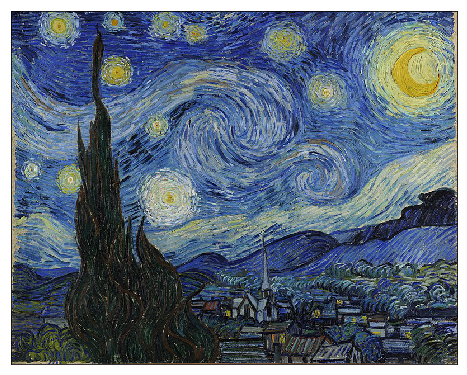

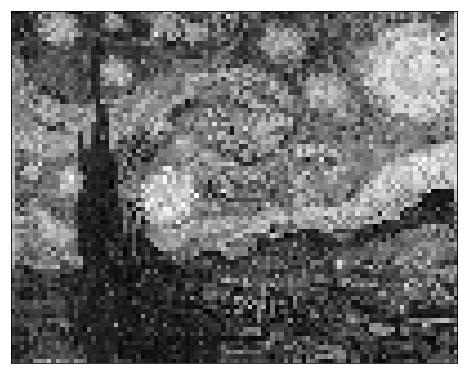

In [20]:
show_image(starry_night)
show_image(starry_bw_lst)

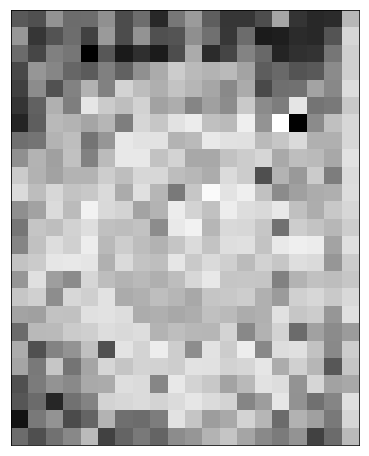

In [21]:
show_image([
    row[80:]
    for row in starry_bw_lst[:25]
])

### Introducing NumPy

In [22]:
import numpy as np

In [23]:
np.__version__

'1.15.1'

In [24]:
np.show_config()

mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/anaconda1anaconda2anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/anaconda1anaconda2anaconda3/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/anaconda1anaconda2anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/anaconda1anaconda2anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/anaconda1anaconda2anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/anaconda1anaconda2anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/anaconda1anaconda2anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/anaconda1anaconda2anaconda3/include']
lapack_opt_info:
    libraries 

### Playground: The Starry Night

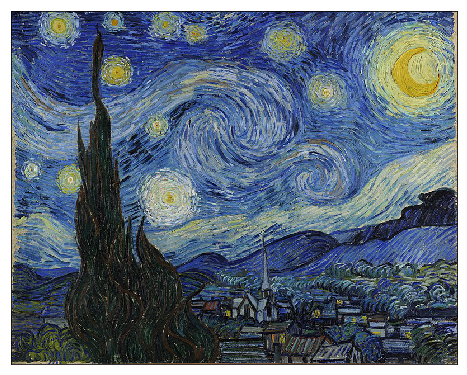

In [25]:
show_image(starry_night)

### Playground: Boston house prices dataset

1. _CRIM_ per capita crime rate by town
2. _ZN_ proportion of residential land zoned for lots over 25,000 sq.ft.
3. _INDUS_ proportion of non-retail business acres per town
4. _CHAS_ Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. _NOX_ nitric oxides concentration (parts per 10 million)
6. _RM_ average number of rooms per dwelling
7. _AGE_ proportion of owner-occupied units built prior to 1940
8. _DIS_ weighted distances to five Boston employment centres
9. _RAD_ index of accessibility to radial highways
10. _TAX_ full-value property-tax rate per \$10,000
11. _PTRATIO_ pupil-teacher ratio by town
12. _B_ $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
13. _LSTAT_ \% lower status of the population

In [26]:
boston.data.shape

(506, 13)

In [27]:
img = starry_bw.copy()

In [28]:
img[starry_bw < 60] = 0

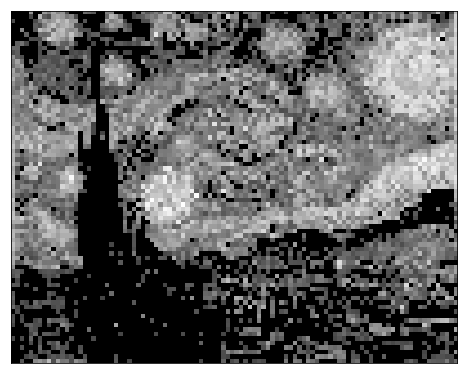

In [29]:
show_image(img)

### Introducing np.ndarray

* Introduction to ndarray
* Vectorization
* Memory Efficency
* Performance Comparison

In [30]:
%timeit list_rand(100);

1.32 ms ± 343 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit np.random.rand(100);

3.32 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Getting Help

* [Numpy User Guide](https://docs.scipy.org/doc/numpy-1.15.0/user/index.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy-1.15.0/reference/index.html)
* ipython/jupyter's `?`
* `np.lookfor`

**Exercise:** How to get the documentation of the numpy add function?

### Basic operations

* Array creation
* Creation functions `np.arange`, `np.linspace`, `np.diag`, `np.zeroes`, `np.ones`, `np.eye`
* Generating random functions with `np.random`
* NumPy data types & casting

In [32]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

In [33]:
starry_bw.shape

(79, 100)

In [34]:
np.linspace(0, 2*np.pi, 100)

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [35]:
np.ones([5, 5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [36]:
np.zeros([5, 5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [37]:
np.random.beta(1, 1, size=[20, 10, 15, 60])

array([[[[7.38552969e-01, 8.58492226e-01, 1.44827807e-02, ...,
          8.36486920e-01, 5.46244935e-01, 6.17672168e-01],
         [3.88533785e-02, 2.66470239e-01, 8.91566390e-01, ...,
          4.21012588e-01, 4.60523791e-01, 4.05114356e-01],
         [1.29501130e-01, 9.60345172e-01, 9.02486058e-01, ...,
          2.44526712e-01, 7.83531767e-02, 9.20509197e-02],
         ...,
         [5.95873589e-01, 8.39815657e-01, 2.96016316e-01, ...,
          5.42604393e-01, 2.57816888e-01, 1.40139838e-01],
         [7.47213526e-01, 1.60132919e-01, 5.84714953e-01, ...,
          6.42410109e-01, 6.73655879e-01, 3.28070302e-02],
         [3.16238235e-01, 6.83333013e-01, 2.62589010e-01, ...,
          5.19049920e-01, 5.57604413e-02, 4.99431298e-01]],

        [[4.65317969e-01, 5.91761097e-01, 4.17816256e-03, ...,
          9.98732630e-01, 9.68388898e-01, 7.14216443e-01],
         [3.49308915e-01, 4.04554874e-01, 7.81201180e-01, ...,
          6.31036431e-01, 5.59712986e-01, 4.65646618e-01],
        

In [38]:
np.sin(np.array([1, 2, 3]))

array([0.84147098, 0.90929743, 0.14112001])

**Exercise:** Create a null vector (e.g. all elements are zero) of size 10

In [39]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Exercise:** Create a null vector of size 10 but the fifth value which is 1

In [40]:
x = np.zeros(10, dtype=np.int32)
x[4] = 1
x

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

**Excercise:** Create a 3x3x3 array with random values

In [41]:
np.random.rand(3, 3, 3)

array([[[0.97730136, 0.19248814, 0.25981523],
        [0.29256714, 0.15249866, 0.88432987],
        [0.11941042, 0.56981228, 0.68056994]],

       [[0.15877151, 0.96251366, 0.29843405],
        [0.02920474, 0.37453243, 0.55055664],
        [0.27932604, 0.11602842, 0.11626566]],

       [[0.96304041, 0.0329274 , 0.44483237],
        [0.8294527 , 0.00190052, 0.28241458],
        [0.45035909, 0.97867617, 0.71906151]]])

In [42]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

**Exercise:** Create a vector with values 10,11,...,49

In [44]:
np.arange(10, 50)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

**Excercise:** Create a 5x5 matrix with values 1,2,3,4 just below the diagonal

In [45]:
np.diag([1, 2, 3, 4], k=-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

**Exercise:** Compute $2 sin(x)^2$ at 10 equally spaced points in $[0, 2\pi]$

In [46]:
2 * np.sin(np.linspace(0, 2*np.pi, num=10))**2

array([0.00000000e+00, 8.26351822e-01, 1.93969262e+00, 1.50000000e+00,
       2.33955557e-01, 2.33955557e-01, 1.50000000e+00, 1.93969262e+00,
       8.26351822e-01, 1.19980783e-31])

### Basic Visualization

* `plt.plot`
* `plt.imshow`/`plt.colorbar`

In [47]:
from matplotlib import pyplot as plt

In [48]:
import matplotlib.pyplot as plt

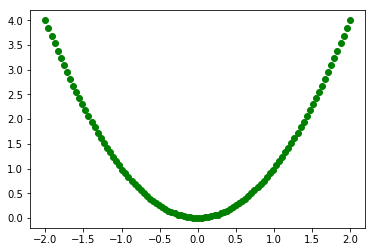

In [49]:
plt.plot(
    np.linspace(-2, 2, 100),
    np.linspace(-2, 2, 100) ** 2,
    'go'
)

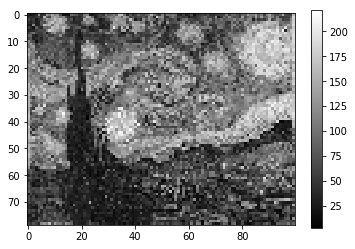

In [50]:
plt.imshow(starry_bw, cmap=plt.cm.gray)
plt.colorbar()

In [51]:
np.random.rand(100, 100)

array([[0.70174161, 0.84236485, 0.00291178, ..., 0.65430842, 0.10843433,
        0.60958121],
       [0.83534121, 0.16685295, 0.18937299, ..., 0.43191496, 0.66029346,
        0.98097472],
       [0.3564807 , 0.46910049, 0.75440887, ..., 0.87600786, 0.6207313 ,
        0.60349872],
       ...,
       [0.2121028 , 0.25116225, 0.92483007, ..., 0.41514034, 0.55487279,
        0.84392971],
       [0.92148635, 0.70664665, 0.76718816, ..., 0.77554608, 0.41357115,
        0.24923948],
       [0.34698797, 0.8651988 , 0.024832  , ..., 0.74531082, 0.36792144,
        0.98335553]])

**Exercise:** Visualize uniform and normal noise images

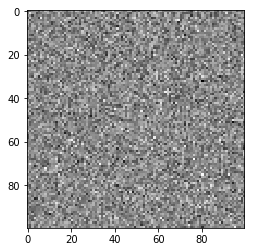

In [52]:
plt.imshow(np.random.randn(100, 100), cmap=plt.cm.gray)

**Exercise:** Scale every pixel in Starry Night between $[0, 1]$ and then plot it

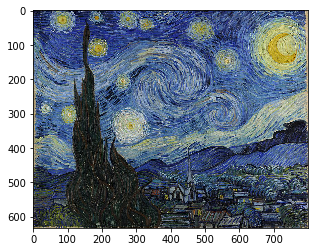

In [53]:
plt.imshow(starry_night / 255, cmap=plt.cm.gray)

**Exercise:** Scale Starry Night and then square every pixel, visualize, what do you see?

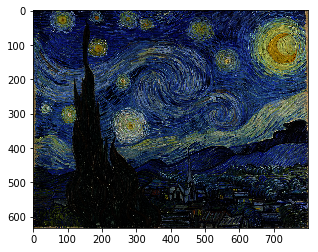

In [54]:
plt.imshow((starry_night / 255) ** 2, cmap=plt.cm.gray)

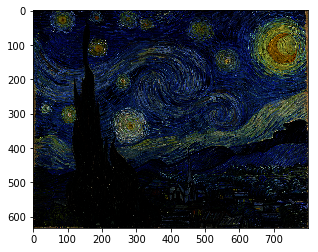

In [55]:
plt.imshow((starry_night / 255) ** 3, cmap=plt.cm.gray)

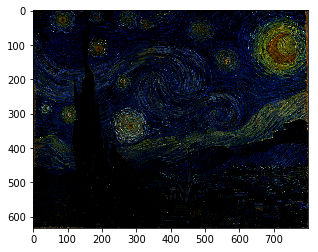

In [56]:
plt.imshow((starry_night / 255) ** 4, cmap=plt.cm.gray)

**Excercise:** Plot $2 sin(x)^2$ in $[0, 2\pi]$

In [57]:
xs = np.linspace(0, 2*np.pi)

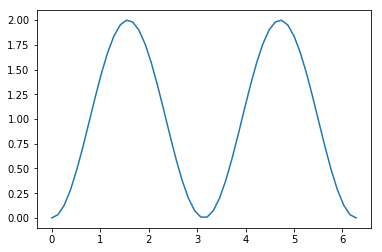

In [58]:
plt.plot(xs, 2*np.sin(xs)**2);

**Excercise:** Draw the unit circle

_Hint_: first choose angle and then find x,y coordinates

In [59]:
ts = np.linspace(0, 2*np.pi)

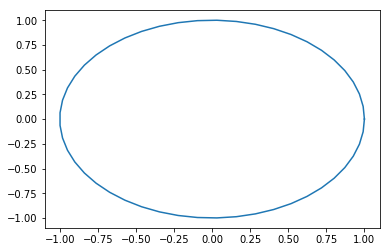

In [60]:
plt.plot(np.cos(ts), np.sin(ts));

### Indexing and slicing

* Slicing
* Boolean Masking
* Masking with Integers
* Views

In [61]:
a = np.array([
    [ 0,  1,  2,  3,  4,  5],
    [ 6,  7,  8,  9, 10, 11],
    [12, 13, 14, 15, 16, 17],
    [18, 19, 20, 21, 22, 23],
    [24, 25, 26, 27, 28, 29],
    [30, 31, 32, 33, 34, 35]]
)

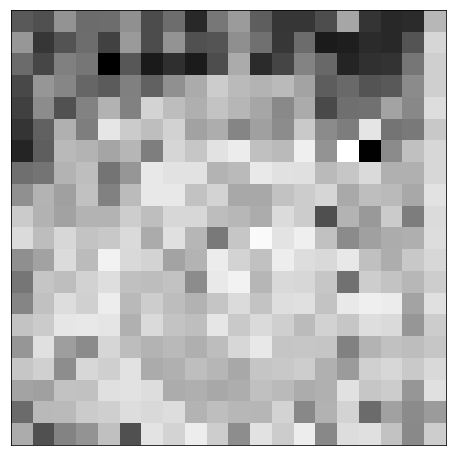

In [62]:
show_image(starry_bw[:20, 80:])

In [63]:
starry_night.shape

(633, 799, 3)

In [64]:
starry_night[0][0]

array([61, 69, 80], dtype=uint8)

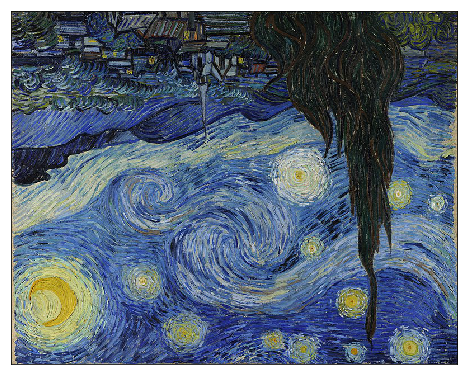

In [65]:
show_image(starry_night[::-1, ::-1, [0, 1, 2]])

In [66]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [67]:
z = a.ravel()

In [68]:
z

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [69]:
z[-1] = 100

In [70]:
a

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34, 100]])

In [71]:
z = 0

In [72]:
np.may_share_memory(a, z)

False

**Excercise:** Reverse a vector (first element becomes last) left-right

In [73]:
a[:, ::-1]

array([[  5,   4,   3,   2,   1,   0],
       [ 11,  10,   9,   8,   7,   6],
       [ 17,  16,  15,  14,  13,  12],
       [ 23,  22,  21,  20,  19,  18],
       [ 29,  28,  27,  26,  25,  24],
       [100,  34,  33,  32,  31,  30]])

In [74]:
np.array([True, False]) & np.array([False, False])

array([False, False])

**Excercise:** Create a 8x8 matrix and fill it with a checkerboard pattern(use views)

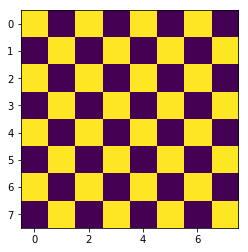

In [76]:
board = np.zeros([8, 8])
board[::2, ::2] = 1
board[1::2, 1::2] = 1
plt.imshow(board)

**Excercise:** Flip a left to right

In [77]:
a[:, ::-1]

array([[  5,   4,   3,   2,   1,   0],
       [ 11,  10,   9,   8,   7,   6],
       [ 17,  16,  15,  14,  13,  12],
       [ 23,  22,  21,  20,  19,  18],
       [ 29,  28,  27,  26,  25,  24],
       [100,  34,  33,  32,  31,  30]])

**Excercise:** Choose every element of boston dataset TAX>600

In [78]:
boston.data[boston.data[:, 9] > 600].shape

(137, 13)

**Excercise:** Choose every element of boston dataset with TAX>600 and AGE>60

In [79]:
boston.data[(boston.data[:, 9] > 600) & (boston.data[:, 6] > 60)].shape

(130, 13)

**Excercise:** plot a scatterplot using `plt.scatter(xs, ys)` to visualize the relationship between TAX & AGE

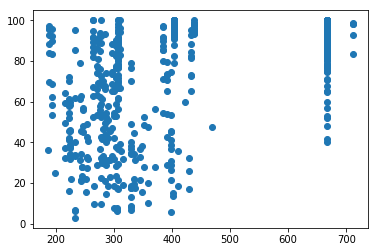

In [80]:
plt.scatter(boston.data[:, 9], boston.data[:, 6])

### Reductions

* `np.sum`/`np.mean`
* `np.argmin`/`np.argmax`
* `np.all`/`np.any`
* `np.cumsum`/`np.cumprod`

In [81]:
boston.data.shape

(506, 13)

In [82]:
list(zip(boston.feature_names, boston.data.mean(axis=0)))

[('CRIM', 3.6135235573122535),
 ('ZN', 11.363636363636363),
 ('INDUS', 11.136778656126504),
 ('CHAS', 0.0691699604743083),
 ('NOX', 0.5546950592885372),
 ('RM', 6.284634387351787),
 ('AGE', 68.57490118577078),
 ('DIS', 3.795042687747034),
 ('RAD', 9.549407114624506),
 ('TAX', 408.2371541501976),
 ('PTRATIO', 18.455533596837967),
 ('B', 356.67403162055257),
 ('LSTAT', 12.653063241106723)]

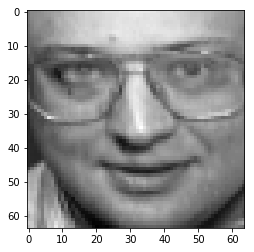

In [83]:
plt.imshow(olivetti.images[-100], cmap=plt.cm.gray)

In [84]:
plt.imshow(, cmap=plt.cm.gray)

SyntaxError: invalid syntax (<ipython-input-84-139b231663a9>, line 1)

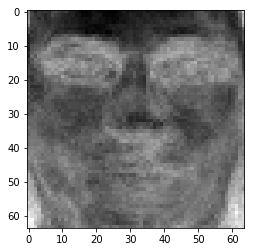

In [85]:
plt.imshow(olivetti.images.mean(axis=0) - np.median(olivetti.images, axis=0), cmap=plt.cm.gray)

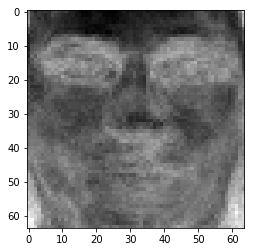

In [86]:
plt.imshow(olivetti.images.mean(axis=0) - np.median(olivetti.images, axis=0), cmap=plt.cm.gray)

**Excercise:** compute n-th fibonacci number

In [87]:
def fib(n):
    pass

**Excercise:** Generate a [5, 5] array replace the largest element with 0

**Excercise:** Compute mean image of olivetti faces dataset

#### Random walk([from Wikipedia](https://en.wikipedia.org/wiki/Random_walk))

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. An elementary example of a random walk is the random walk on the integer number line, $Z$ ${\displaystyle \mathbb {Z} } \mathbb {Z}$ , which starts at $0$ and at each step moves $+1$ or $−1$ with equal probability. 

**Excercise:** Write a function that simulates a 1D single random walk

![](http://www.mit.edu/~kardar/teaching/projects/chemotaxis%28AndreaSchmidt%29/numberline_hops.gif)

> **Input:** number of steps to run the simulation  
> **Output:** position after $n$ steps of simulation 

In [88]:
def simulate_walk(n_steps):
    pass

In [89]:
simulate_walk(100) # return a single number, e.g. -4

**Excercise:** Compute $m$ seperate random walks each for $n$ steps:

In [92]:
def simulate_walks(n_walks, n_steps):
    pass

In [93]:
simulate_walks(3, 100) # return a single number, e.g. array([ -6, -10,  -6])

**Excercise:** Generate 1000 samples from 1D random walk, estimate following values:
* $E(X_{10})$, $E(X_{100})$
* $V(X_{10})$, $V(X_{100})$, $V(X_{1000})$
* $P(X_{10} < 10)$, $P(X_{100} < 10)$, $P(X_{1000} < 10)$

**Excercise:** Simulate a single 2d random walk, visualize it(use `plt.plot`)

#### Sources:
* https://github.com/rougier/numpy-100
* https://www.scipy-lectures.org/
* https://jakevdp.github.io/PythonDataScienceHandbook/